#### Ensure gruyere files can be used

In [1]:
import sys
sys.path.append('..')

In [2]:
import kernex as kex
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from gruyere.brushes import notched_square_brush, circular_brush, show_mask
from gruyere.design import _initialize_design, Design
from gruyere.generator import generate_design, _step_generator
from gruyere.states import DesignState

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 70

# We generate an initial random design 

In [35]:
## We initalize a random array
# size = 30
size = 125
# size = 15

key = jax.random.PRNGKey(42)
latent_design = jax.random.uniform(key, (size,size)) * 2 - 1

In [36]:
## We define the transform function
beta = 4
def transform(design, brush, beta=1):
    @jax.jit
    @kex.kmap(kernel_size=brush.shape, padding=('same','same'))
    def brush_conv(x):
        return jnp.sum(x * brush)

    return jnp.tanh(beta * brush_conv(design))

# Figure 2. (a)  diameter-13 circular brush

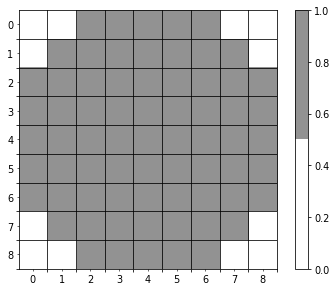

In [39]:
circ_brush = circular_brush(9)
# circ_brush = circular_brush(3)
# circ_brush = circular_brush(13)
show_mask(circ_brush);

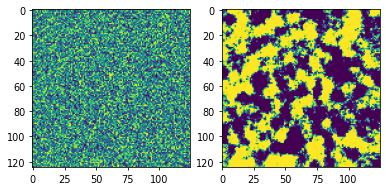

In [40]:
transformed_design1 = transform(latent_design, circ_brush)

fig, ax = plt.subplots(1,2)
ax[0].imshow(latent_design);
ax[1].imshow(transformed_design1);

1 / 15625 15556
2 / 15625 15550
3 / 15625 15543
4 / 15625 15541
5 / 15625 15534
6 / 15625 15532
7 / 15625 15463
8 / 15625 15430
9 / 15625 15428
10 / 15625 15428
11 / 15625 15392
12 / 15625 15392
13 / 15625 15383
14 / 15625 15314
15 / 15625 15305
16 / 15625 15304
17 / 15625 15297
18 / 15625 15295
19 / 15625 15294
20 / 15625 15293
21 / 15625 15284
22 / 15625 15283
23 / 15625 15279
24 / 15625 15279
25 / 15625 15278
26 / 15625 15276
27 / 15625 15276
28 / 15625 15275
29 / 15625 15266
30 / 15625 15263
31 / 15625 15254
32 / 15625 15254
33 / 15625 15185
34 / 15625 15176
35 / 15625 15169
36 / 15625 15167
37 / 15625 15164
38 / 15625 15157
39 / 15625 15154
40 / 15625 15147
41 / 15625 15142
42 / 15625 15139
43 / 15625 15070
44 / 15625 15061
45 / 15625 15058
46 / 15625 15051
47 / 15625 15046
48 / 15625 15045
49 / 15625 15038
50 / 15625 14969
51 / 15625 14964
52 / 15625 14895
53 / 15625 14890
54 / 15625 14821
55 / 15625 14774
56 / 15625 14774
57 / 15625 14747
58 / 15625 14747
59 / 15625 14738
60 / 1

/Users/lucasgrosjean/.pyenv/versions/3.9.1/envs/env_inverse_design/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 127 () missing from current font.
  func(*args, **kwargs)
/Users/lucasgrosjean/.pyenv/versions/3.9.1/envs/env_inverse_design/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128 (\x80) missing from current font.
  func(*args, **kwargs)
/Users/lucasgrosjean/.pyenv/versions/3.9.1/envs/env_inverse_design/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
/Users/lucasgrosjean/.pyenv/versions/3.9.1/envs/env_inverse_design/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 130 (\x82) missing from current font.
  func(*args, **kwargs)
/Users/lucasgrosjean/.pyenv/versions/3.9.1/envs/env_inverse_design/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 131 (\x83) missing from current font.
  func(*args

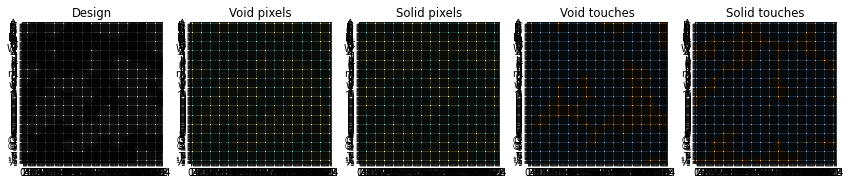

In [41]:
circ_design = generate_design(transformed_design1, circ_brush)
circ_design.show()

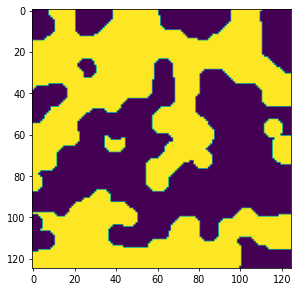

In [42]:
plt.imshow(circ_design.x)

# Figure 2. (b) width-13 notched square brush

notch_brush = notched_square_brush(13,1)
show_mask(notch_brush);

transformed_design2 = transform(latent_design, notch_brush)

fig, ax = plt.subplots(1,2)
ax[0].imshow(latent_design);
ax[1].imshow(transformed_design1);

notch_design = generate_design(transformed_design2, notch_brush)
notch_design.visualize()

# Debug

In [29]:
from gruyere.states import *

transformed_design1 *= -1

In [30]:
it = 0
des = _initialize_design(transformed_design1.shape)

@jax.jit
@kex.kmap(kernel_size=circ_brush.shape, padding=('same','same'))
def fun_dilation(x):
    return jnp.sum(x * circ_brush)

Step : 0


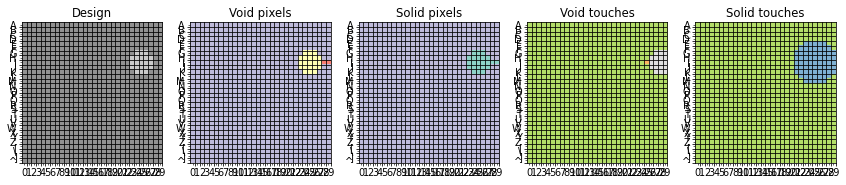

In [31]:
new_des = _step_generator(des, transformed_design1, fun_dilation)
new_des.show()
print('Step :', it)

Step : 1
Step : 2
Step : 3
Step : 4
Step : 5
Step : 6
Step : 7
Step : 8
Step : 9
Step : 10
Step : 11
Step : 12
Step : 13
Step : 14
Step : 15
Step : 16
Step : 17
Step : 18
Step : 19
Step : 20


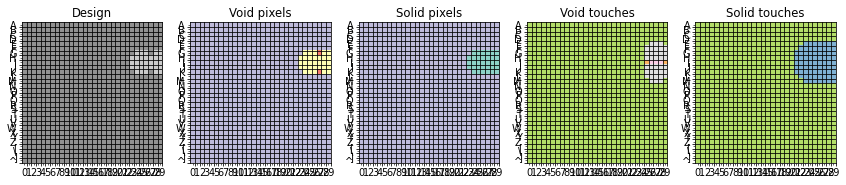

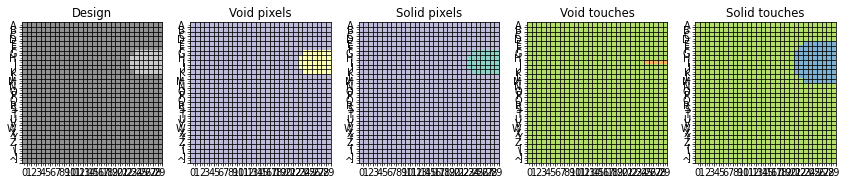

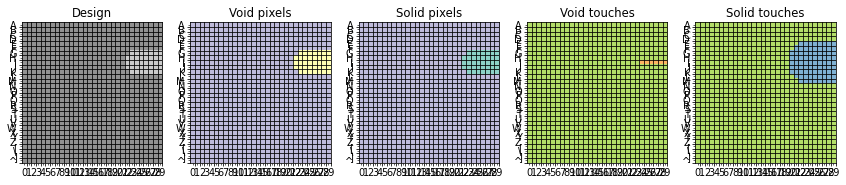

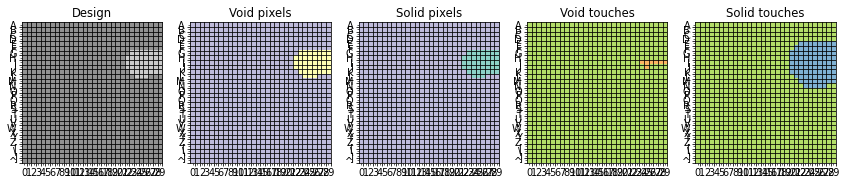

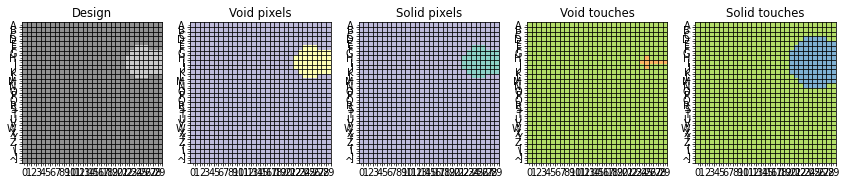

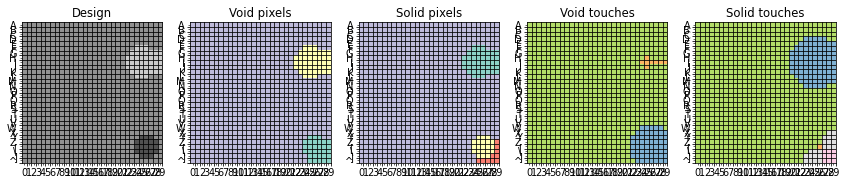

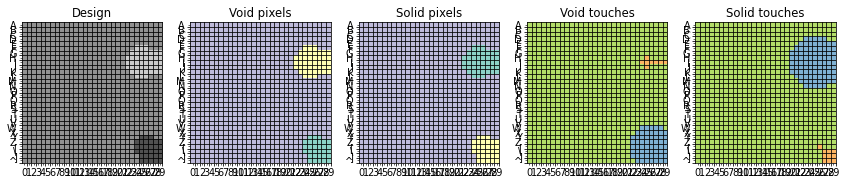

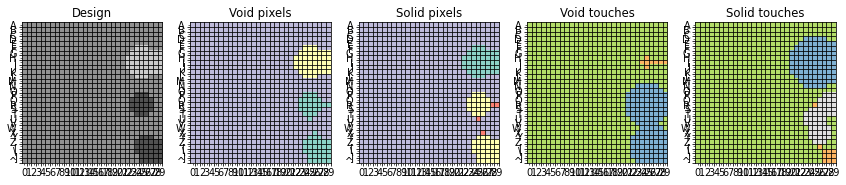

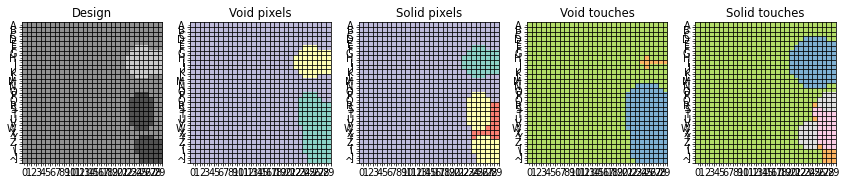

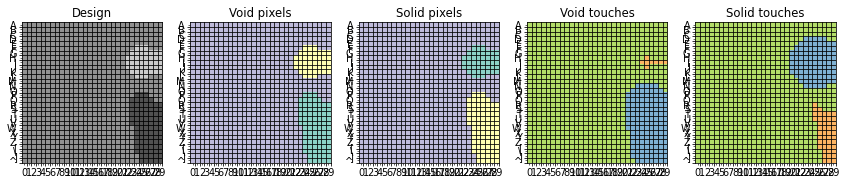

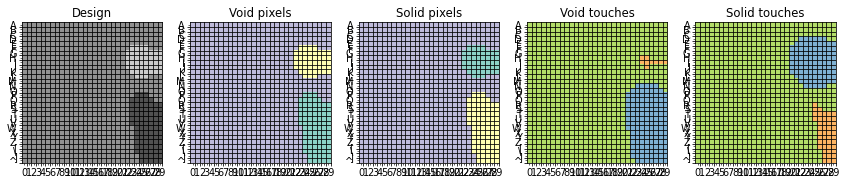

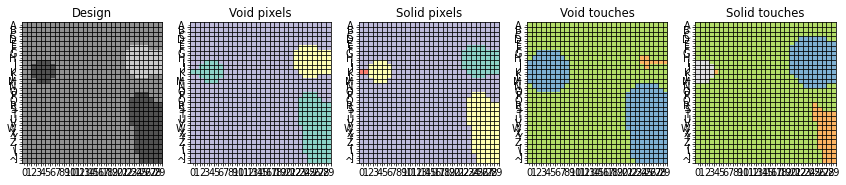

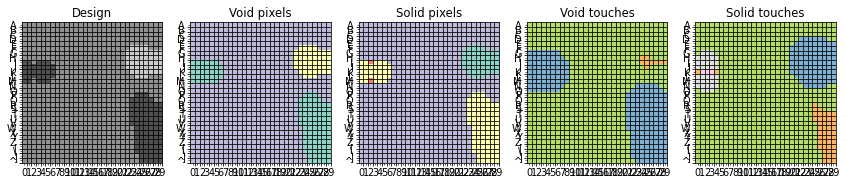

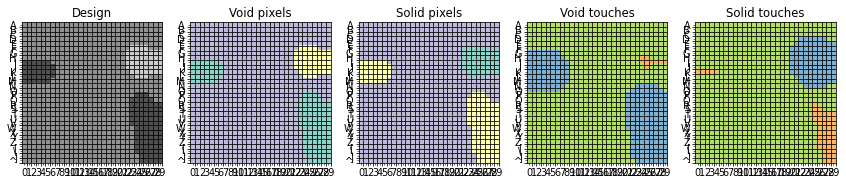

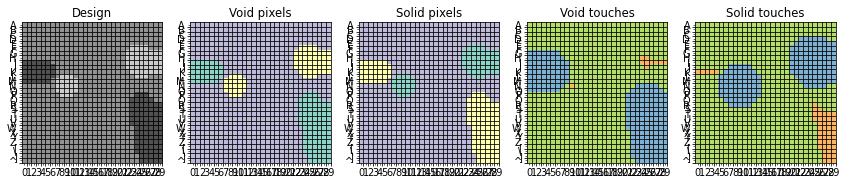

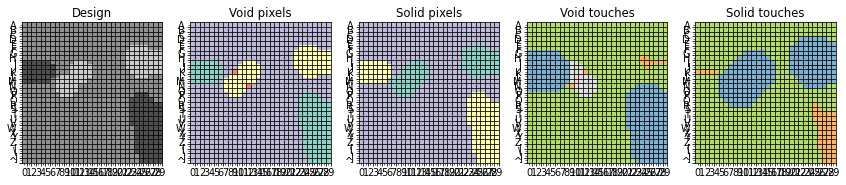

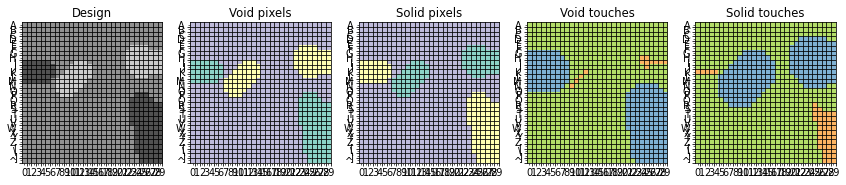

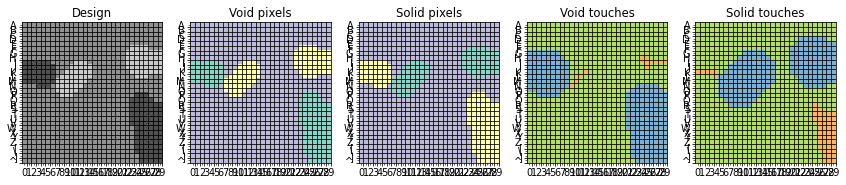

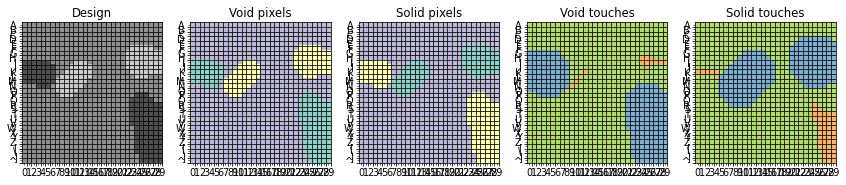

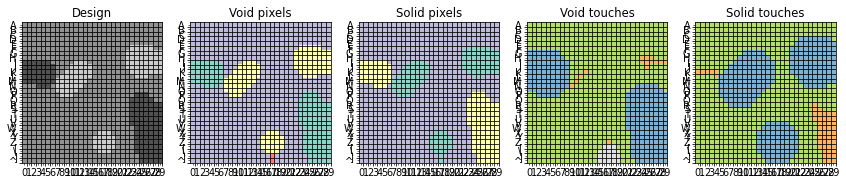

In [32]:
while it < 20:
    new_des = _step_generator(new_des, transformed_design1, fun_dilation)
    it += 1
    new_des.show()
    print('Step :', it)

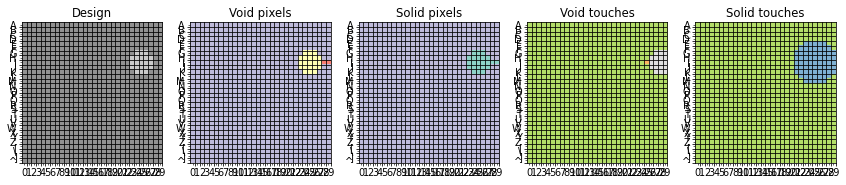

In [11]:
new_des = _step_generator(des, transformed_design1, fun_dilation)
new_des.show()

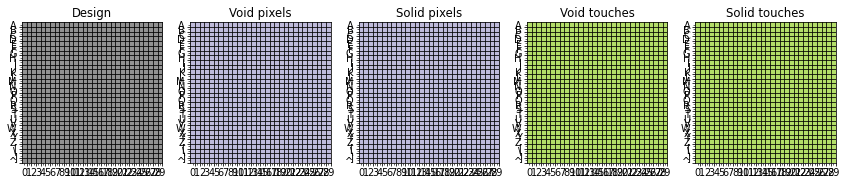

In [12]:
p_void = des.p_v
p_solid = des.p_s
t_void = des.t_v
t_solid = des.t_s

des.show()

-1.0


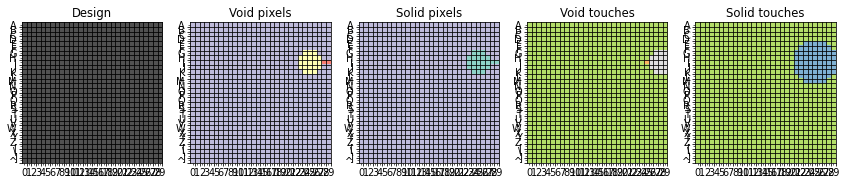

In [13]:
reward = transformed_design1

# Step 1
idx_max = jnp.unravel_index(jnp.abs(transformed_design1).argmax(), shape=reward.shape)
print(transformed_design1[idx_max])
assert transformed_design1[idx_max] == -1
t_void = t_void.at[idx_max].set(TouchState.EXISTING)

# Step 2
p_void = jnp.where(fun_dilation(t_void == TouchState.EXISTING), PixelState.EXISTING, p_void)

# Step 3
t_solid = jnp.where(fun_dilation(p_void == PixelState.EXISTING), TouchState.INVALID, t_solid)

# Step 4
p_solid = jnp.where((fun_dilation((t_solid == TouchState.EXISTING) | (t_solid == TouchState.VALID))) == 0
                    ,PixelState.IMPOSSIBLE,p_solid)

# Step 5
t_void = jnp.where(~(t_void == TouchState.INVALID) & ~(t_void == TouchState.EXISTING),
                   TouchState.VALID,t_void)

# Step 6
t_void = jnp.where(
        ((fun_dilation((p_solid == PixelState.POSSIBLE) | (p_solid == PixelState.EXISTING))) == 0)
        & (t_void == TouchState.VALID), TouchState.FREE, t_void)

# Step 7
p_void = jnp.where((p_void == PixelState.POSSIBLE) & (p_solid == PixelState.IMPOSSIBLE),
                   PixelState.REQUIRED, p_void)

# Step 8
t_void = jnp.where(
        fun_dilation(p_void == PixelState.REQUIRED) * (t_void == TouchState.VALID),
        TouchState.RESOLVING, t_void)

# Step 9

des2 = Design(p_void, p_void, p_solid, t_void, t_solid)
des2.show()

True
0.8677038


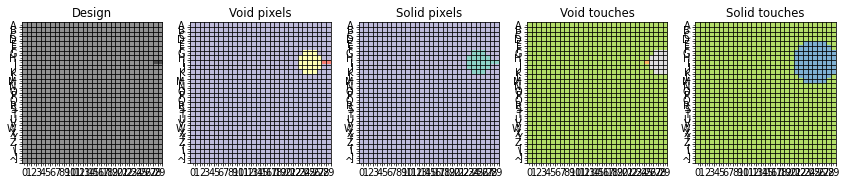

In [14]:
p_void = des2.p_v
p_solid = des2.p_s
t_void = des2.t_v
t_solid = des2.t_s

# Check if REQUIRED
print(jnp.any(p_void == PixelState.REQUIRED))
mask_req_void = (p_void == PixelState.REQUIRED)
idx_req = jnp.unravel_index(jnp.abs(transformed_design1 * mask_req_void).argmax(), shape=reward.shape)
print(reward[idx_req])

des3 = Design(mask_req_void, p_void, p_solid, t_void, t_solid)
des3.show()